# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [25]:
data = pd.read_csv('weight-height.csv')
male_df =  data.loc[data['Gender'] == 'Male']
female_df =  data.loc[data['Gender'] == 'Female']

male_height_mu = male_df['Height'].mean()
male_height_std = male_df['Height'].std()
male_weight_mu = male_df['Weight'].mean()
male_weight_std = male_df['Weight'].std()

female_height_mu = female_df['Height'].mean()
female_height_std = female_df['Height'].std()
female_weight_mu = female_df['Weight'].mean()
female_weight_std = female_df['Weight'].std()

print("Male Height mean:", male_height_mu)
print("Male Height std:", male_height_std)
print("Male Weight mean:", male_weight_mu)
print("Male Weight std:", male_weight_std)

print()

print("Female Height mean:", female_height_mu)
print("Female Height std:", female_height_std)
print("Female Weight mean:", female_weight_mu)
print("Female Weight std:", female_weight_std)

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height mean: 69.02634590621741
Male Height std: 2.863362228660647
Male Weight mean: 187.0206206581932
Male Weight std: 19.7811545167638

Female Height mean: 63.70877360342507
Female Height std: 2.696284015765054
Female Weight mean: 135.86009300746835
Female Weight std: 19.022467805319028


In [23]:
male_height_mu

69.02634590621741

## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

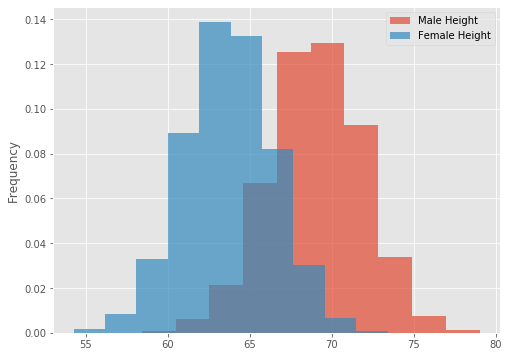

In [27]:
# Your code here

plt.figure(figsize = (8, 6))
bin = 10

male_df['Height'].plot.hist(bins=bin, density=True, alpha=0.7, label="Male Height")
female_df['Height'].plot.hist(bins=bin, density=True, alpha=0.7, label="Female Height")
plt.legend()
plt.show()

In [28]:
# Record your observations - are these inline with your personal observations?

# Men tend to have higher heights than women
# The most common height is between 65-67 inchese
# Male heights have a wider range than women's heights which is why the peak for men is lower
# Both are normally distributed

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

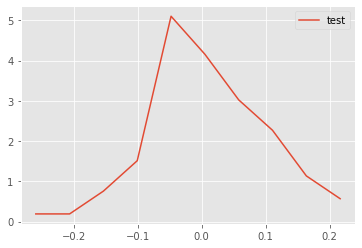

In [29]:
def density(x):
    
    n, bins = np.histogram(x, 10, density=1)
    
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
        
    return pdfx, pdfy

# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

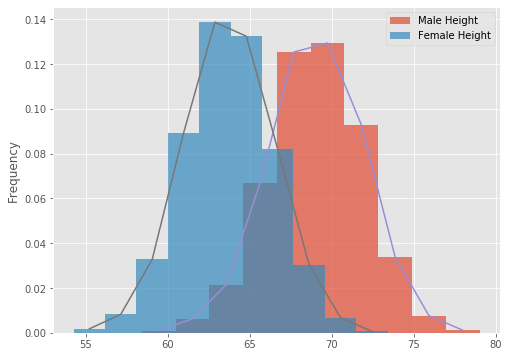

In [36]:
# Your code here 
plt.figure(figsize = (8, 6))
bin = 10

male_df['Height'].plot.hist(bins=bin, density=True, alpha=0.7, label="Male Height")
female_df['Height'].plot.hist(bins=bin, density=True, alpha=0.7, label="Female Height")

x,y = density(male_df['Height'])
plt.plot(x,y)
x,y = density(female_df['Height'])
plt.plot(x,y)

plt.legend()
plt.show()

## Repeat the above exercise for male and female weights

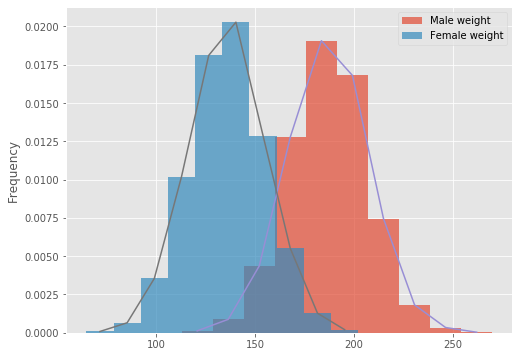

In [38]:
# Your code here 

plt.figure(figsize=(8,6))

binsize=10

male_df.Weight.plot.hist(bins = binsize, density = True,  alpha = 0.7, label ="Male weight");
female_df.Weight.plot.hist(bins = binsize, density = True, alpha = 0.7, label = 'Female weight');
plt.legend()
x,y = density(male_df.Weight)
plt.plot(x,y)
x,y = density(female_df.Weight)
plt.plot(x,y)
plt.show()

## Write your observations in the cell below

In [39]:
# Record your observations - are these inline with your personal observations?

# The patterns and overlap are highly similar to what we see with height distributions
# Men generally are heavier than women
# The common region for common weights is around 160 lbs. 
# Male weight has slightly higher spread than female weight (i.e. more variation)
# Most females are around 130-140 lbs whereas most men are around 180 pounds.

# What is the takeaway when comparing male and female heights and weights?

# Weight is more suitable to distinguish between males and females than height

## Repeat the above experiments in seaborn and compare with your results

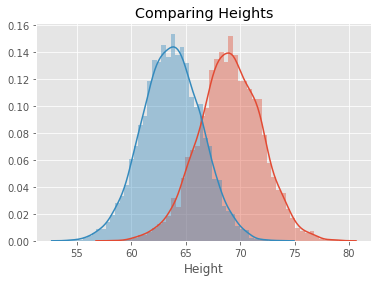

In [41]:
# Code for heights here

import seaborn as sns

sns.distplot(male_df.Height)
sns.distplot(female_df.Height)
plt.title('Comparing Heights')
plt.show()

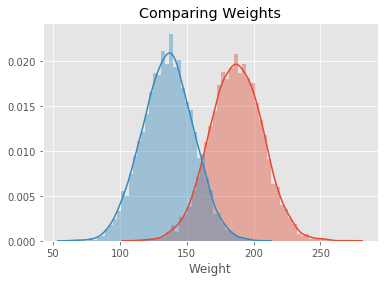

In [43]:
# Code for weights here

sns.distplot(male_df['Weight'])
sns.distplot(female_df['Weight'])
plt.title('Comparing Weights')
plt.show()

In [11]:
# Your comments on the two approaches here. 

# are they similar? what makes them different if they are?

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.